<a href="https://colab.research.google.com/github/Panagiotis-Bosinas/Machine_Learning_Assignments/blob/main/Ergasia6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
import umap

## Ερώτημα 1

In [ ]:
df = pd.read_csv('bankloan.csv')
profile = ProfileReport(df, title="Loan Profile Report")
profile.to_file("report.html")

## Ερώτημα 2

1) Το μέσο loan_amnt που αιτούνται οι υποψήφιοι είναι 15257.97 δολάρια. Το ελάχιστο δάνειο που ζητήθηκε είναι 1000 ενώ το μέγιστο 35000 δολάρια .

2) Σίγουρα μπορούμε να αφαιρέσουμε τις στήλες Row ID, id και member_id, αφού δεν βγάζει νόημα να ληφθούν υπόψη στην κατηγοριοποίηση των υποψήφιων δανειοληπτών. Επίσης πρέπει να αφαιρέσουμε το feature "Unnamed:50" αφού έχει μόνο Nan values. Μπορούμε να αφαιρέσουμε και τις 2 τελευταίες στήλες "36 months" και "60 months" καθώς αποτελούνται κατά 99.8% από κενά κελιά και η ίδια πληροφορία μπορεί να αντιπροσωπευθεί από την στήλη "term". Για τον ίδιο λόγο αφαιρούμε την στήλη "dti_joint" και annual_inc_joint". Τέλος, αφαιρούμε την στήλη "grade", αφού την ίδια πληροφορία λαμβάνουμε από την στήλη "sub-grade".

In [110]:
print(df.columns.tolist())

df = df.drop(columns=['Row ID','id', 'member_id', 'Unnamed: 50',
                      '36months', '60months','dti_joint','annual_inc_joint',
                      'emp_title', 'grade','mths_since_last_major_derog','earliest_cr_line','title'],errors='ignore')

['Row ID', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'application_type', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'Unnamed: 50', '36months', '60months']


3) Ορισμένες στήλες είναι categorical και περιέχουν strings. Επομένως, με label encoding θα πρέπει να μετατρέψουμε τα strings σε αριθμούς. Κάποιες άλλες στήλες περιέχουν ημερομηνίες σε strings, οπότε μπορούμε να τις μετατρέψουμε σε datetime και να χωρίσουμε την πληροφορία σε διαφορετικά features ώστε να μπορεί να τα διαχειριστεί το μοντέλο. Ακόμη, σε πολλές στήλες υπάρχουν ακραία outliers που πρέπει να εξομαλυνθούν. Μπορούμε να κρατήσουμε τις τιμές που βρίσκονται κάτω από το 95ο percentile, μιας και οι τιμές αυτές είναι λίγες. Η στήλη 'mths_since_last_delinq' έχει πολλές κενές τιμές. Επειδή θέλουμε να κρατήσουμε την στήλη γιατί περιέχει χρήσιμη πληροφορία, αλλά δεν μπορούμε να τις γεμίσουμε λόγω του μεγέθους που αντιπροσωπεύει η στήλη, αλλά ούτε και να τις πετάξουμε γιατί είναι σχεδόν οι μισές, μπορούμε να κάνουμε flag τις κενές τιμές και να τις ορίσουμε ως νέα στήλη για να διατηρήσουμε την πληροφορία. Τέλος, η στήλη 'emp_length' περιέχει μία ordered λίστα με strings, οπότε πρέπει να κάνουμε mapping με κατάλληλα labels.

Label encoding

In [111]:
le_term = LabelEncoder()
df['term'] = le_term.fit_transform(df['term'])

le_app = LabelEncoder()
df['application_type'] = le_app.fit_transform(df['application_type'])

le_home_own = LabelEncoder()
df['home_ownership'] = le_home_own.fit_transform(df['home_ownership'])

le_ver_stat = LabelEncoder()
df['verification_status'] = le_ver_stat.fit_transform(df['verification_status'])

le_loan_stat = LabelEncoder()
df['loan_status'] = le_loan_stat.fit_transform(df['loan_status'])

le_purpose = LabelEncoder()
df['purpose'] = le_purpose.fit_transform(df['purpose'])

le_initial_list_status = LabelEncoder()
df['initial_list_status'] = le_initial_list_status.fit_transform(df['initial_list_status'])

Flag

In [112]:
df['mths_since_last_delinq_missing'] = df['mths_since_last_delinq'].isna().astype(int)
df['mths_since_last_delinq' ]= df['mths_since_last_delinq'].fillna(-1)

Outliers

In [113]:
for col in ['annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec',
            'revol_bal','revol_util','total_acc','out_prncp',
            'total_pymnt','total_rec_prncp','total_rec_int',
            'last_pymnt_amnt',]:
    upper = df[col].quantile(0.95)
    df[col] = np.clip(df[col], df[col].min(), upper)


Mapping

In [114]:
emp_map = {'< 1 year': 0,'1 year': 1,'2 years': 2,'3 years': 3,'4 years': 4,
    '5 years': 5,'6 years': 6,'7 years': 7,'8 years': 8,'9 years': 9,
           '10+ years': 10}

df['emp_length'] = df['emp_length'].map(emp_map)
df['emp_length'] = df['emp_length'].fillna(-1)

Datetimes

In [115]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%d-%b')
df['issue_month'] = df['issue_d'].dt.month
df['issue_day'] = df['issue_d'].dt.day

df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%d-%b', errors='coerce')
df['last_pymnt_day'] = df['last_pymnt_d'].dt.day.fillna(-1)
df['last_pymnt_month'] = df['last_pymnt_d'].dt.month.fillna(-1)

df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%d-%b', errors='coerce')
df['next_pymnt_day'] = df['next_pymnt_d'].dt.day.fillna(-1)
df['next_pymnt_month'] = df['next_pymnt_d'].dt.month.fillna(-1)

df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%d-%b', errors='coerce')
df['last_credit_pull_day'] = df['last_credit_pull_d'].dt.day.fillna(-1)
df['last_credit_pull_month'] = df['last_credit_pull_d'].dt.month.fillna(-1)

4) Μπορούμε να θέσουμε τα Α,Β1 και Β2 ως 1 και τα υπόλοιπα ως 0.

In [116]:
df['target'] = df['sub_grade'].isin(['A1','Α2', 'Α3', 'Α4', 'Α5',
                                     'B1', 'B2']).astype(int)

5)Θα πρέπει να χωρίσουμε το dataset σε υποσύνολα με εύρος 5000 και να βρούμε την πιθανότητα να εγκριθεί το δάνειο σε κάνει υποσύνολο.

In [117]:
subset = np.arange(df['loan_amnt'].min(), df['loan_amnt'].max()+5000, 5000)
df['loan_subset'] = pd.cut(df['loan_amnt'], subset)

approval_stats = df.groupby('loan_subset')['target'].mean()

approved_subset = approval_stats[approval_stats >= 0.15]

print(approved_subset)

loan_subset
(1000, 6000]      0.154247
(6000, 11000]     0.183306
(11000, 16000]    0.152650
Name: target, dtype: float64


/tmp/ipython-input-882842041.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_stats = df.groupby('loan_subset')['target'].mean()


Άρα, τα δάνεια από 1000 έως και 16000 δολάρια έχουν πάνω από 15% πιθανότητα να εγκριθούν.

## Ερώτημα 3

1) Θα κανονικοποιήσουμε τα δεδομένα με z-score κανονικοποίηση, διότι το dataset περιέχει πολλούς διαφορετικούς τύπους δεδομένων με διαφορετικές κλίμακες αλλά και πολύ διαφορετικές διακυμάνσεις. Η z-score θα φέρει τα δεδομένα στην ίδια κλίμακα, θα τα τοποθετήσει γύρω από το μηδέν και θα κανονικοποιήσει και την διακύμανση.

In [118]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('target')

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

2)Εφαρμόζουμε train-test split. Ορισμένα δεδομένα ενδέχεται να ξέφυγαν και να μην μετατράπηκαν σε numeric τιμές, οπότε για σιγουριά επιλέγουμε μόνο αυτές.

In [119]:
inputs_df = df[numeric_features]
targets_df = df['target']

x = inputs_df.to_numpy()
y = targets_df.to_numpy()

seed = 0
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed, stratify=y)
x.shape

(212999, 42)

In [120]:
df = df.drop(columns=['sub_grade'])

In [121]:
rf = RandomForestClassifier(random_state=seed, n_jobs=-1)

param = {'max_depth': [3, 5, None]}
grid = GridSearchCV(rf, param, cv=3, scoring='f1', n_jobs=-1)
grid.fit(x_train, y_train)

best_rf = grid.best_estimator_

y_pred = best_rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00


## Ερώτημα 4

1) Έχουμε ήδη εκπαιδεύσει το Random Forest.

In [122]:
importances = pd.Series(best_rf.feature_importances_, index=inputs_df.columns)
top_15_features = importances.sort_values(ascending=False).head(15)
print("Top 15 features:")
print(top_15_features)


Top 15 features:
int_rate               0.650875
total_rec_int          0.042668
installment            0.032507
total_rec_prncp        0.031207
last_pymnt_amnt        0.023204
total_pymnt            0.021920
out_prncp              0.016937
total_rev_hi_lim       0.016854
term                   0.014954
revol_util             0.014540
verification_status    0.013909
loan_amnt              0.012485
dti                    0.012255
funded_amnt            0.011802
annual_inc             0.010685
dtype: float64


2.

                     int_rate  total_rec_int  installment  total_rec_prncp  \
int_rate             1.000000       0.455429     0.117848        -0.152170   
total_rec_int        0.455429       1.000000     0.578710         0.644471   
installment          0.117848       0.578710     1.000000         0.598020   
total_rec_prncp     -0.152170       0.644471     0.598020         1.000000   
last_pymnt_amnt      0.104303       0.630451     0.896787         0.664088   
total_pymnt          0.096058       0.847274     0.643650         0.938621   
out_prncp            0.131122       0.571331     0.898164         0.441646   
total_rev_hi_lim    -0.196039       0.120830     0.329889         0.229570   
term                 0.450081       0.430059     0.123242        -0.127744   
revol_util           0.206194       0.165190     0.128793         0.044844   
verification_status  0.288953       0.090164     0.089269        -0.031938   
loan_amnt            0.142637       0.627593     0.942279       

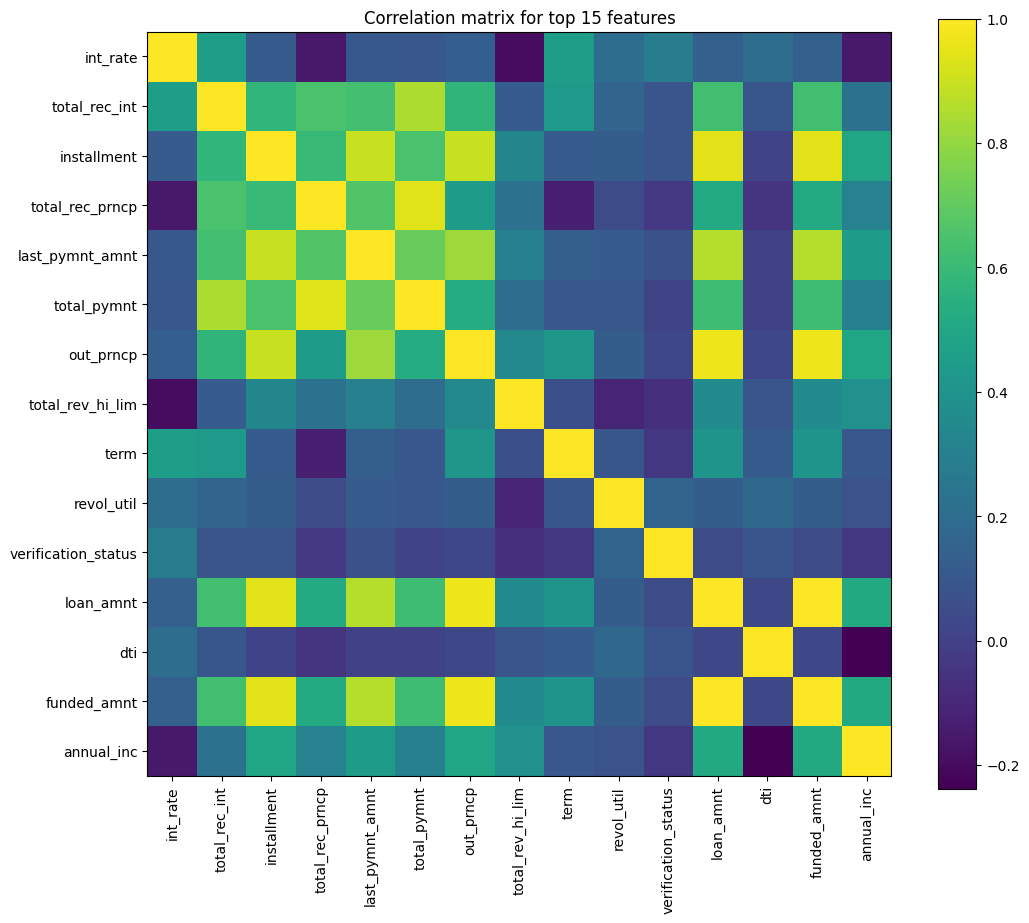

In [123]:
top_15_columns = top_15_features.index
top_15_df = inputs_df[top_15_columns]

corr_matrix = top_15_df.corr()
print(corr_matrix)

plt.figure(figsize=(12,10))
plt.imshow(corr_matrix, interpolation='none')
plt.colorbar()
plt.xticks(range(len(top_15_columns)), top_15_columns, rotation=90)
plt.yticks(range(len(top_15_columns)), top_15_columns)
plt.title("Correlation matrix for top 15 features")
plt.show()

Υπάρχουν πράγματι χαρακτηριστικά που συσχετίζονται έντονα μεταξύ τους. Ορισμένα μάλιστα φαίνεται να έχουν correlation = 1. Που σημαίνει ότι πρακτικά δίνουν την ίδια ακριβώς πληροφορία.

3. Μπορούμε να κρατήσουμε τα features που δεν έχουν μεγάλη συσχέτιση με κανένα άλλο feature.

In [124]:
new_features = ['int_rate', 'total_rev_hi_lim', 'revol_util',
      'verification_status', 'term', 'dti', 'annual_inc']

x_select = df[new_features].copy()
y_select = df['target'].copy()

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x_select, y_select, test_size=test_size, random_state=seed, stratify=y_select)


rf_new = RandomForestClassifier(random_state=seed, n_jobs=-1)

param = {'max_depth': [3, 5, None]}
grid = GridSearchCV(rf_new, param, cv=3, scoring='f1', n_jobs=-1)
grid.fit(x_train, y_train)

best_rf_new = grid.best_estimator_

y_pred = best_rf_new.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00


Kαι στις δύο περιπτώσεις το μοντέλο έχει 100% ακρίβεια στα test data. Αυτό ίσως σημαίνει ότι το Random Forest είναι υπερβολικά περίπλοκος αλγόριθμος για το συγκεκριμένο πρόβλημα ή τα δεδομένα είναι πολύ εύκολα διαχωρίσιμα.

## Ερώτημα 5

1)

In [126]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [127]:
x_train = x_train.reshape(len(x_train), -1)
x_test  = x_test.reshape(len(x_test), -1)
x_train.shape

(60000, 784)

2.

In [132]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

3.

In [135]:
pca = PCA(n_components=300)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [137]:
N = len(x_train)
k = [5, 15, 51, 101]

accuracies_train = []
accuracies_test = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)

    accuracies_train.append(accuracy_score(y_train, y_train_pred))
    accuracies_test.append(accuracy_score(y_test, y_test_pred))

print("Train accuracies:", accuracies_train)
print("Test accuracies:", accuracies_test)

Train accuracies: [0.9819166666666667, 0.971, 0.9532333333333334, 0.9410333333333334]
Test accuracies: [0.9688, 0.9633, 0.9533, 0.9437]


Βλέπουμε ότι η ακρίβεια μειώνεται με αύξηση του k. Αυτό είναι λογικό, αφού με αύξηση του αριθμού των γειτόνων, απομακρυνόμαστε από την περιοχή που βρίσκεται το καινούριο σημείο και συμψηφίζουμε δεδομένα που δεν έχουν τόση συσχέτιση με αυτό, τα οποία όμως επηρεάζουν το τελικό αποτέλεσμα. Ωστόσο, σε σύγκριση με τα αποτελέσματα της προηγούμενης άσκησης, δεν φαίνεται να αυξήθηκε η ακρίβεια με PCA.

4.

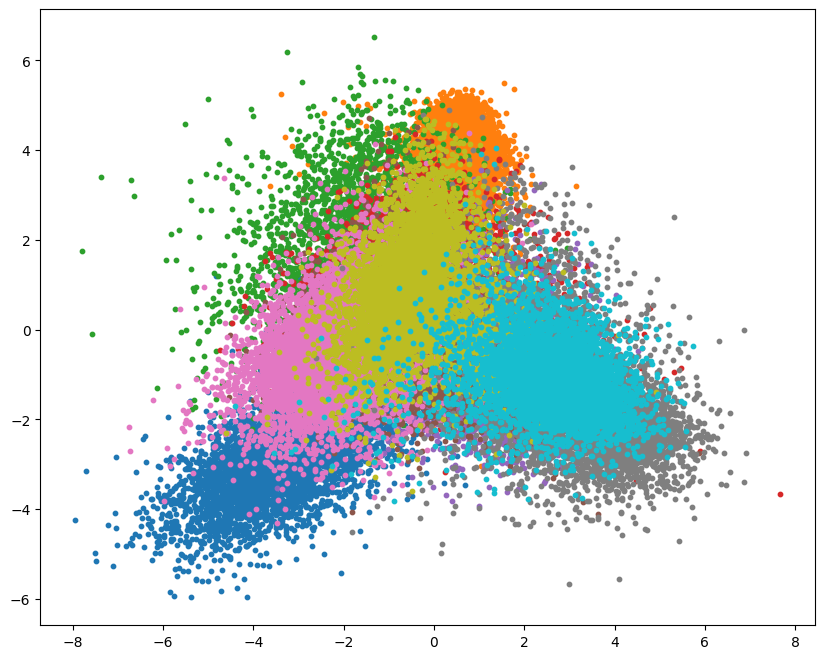

In [140]:
lda = LDA(n_components=2)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

plt.figure(figsize=(10, 8))
for digit in range(10):
    plt.scatter(x_train_lda[y_train == digit, 0], x_train_lda[y_train == digit, 1], s=10, label=str(digit))

Από το διάγρμμα βλέπουμε ότι τα ψηφία διακρίνονται ξεκάθα σε κλάσεις. Ωστόσο, κατά ένα μεγάλο μέρος τους αλλεπικαλύπτονται.

5.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


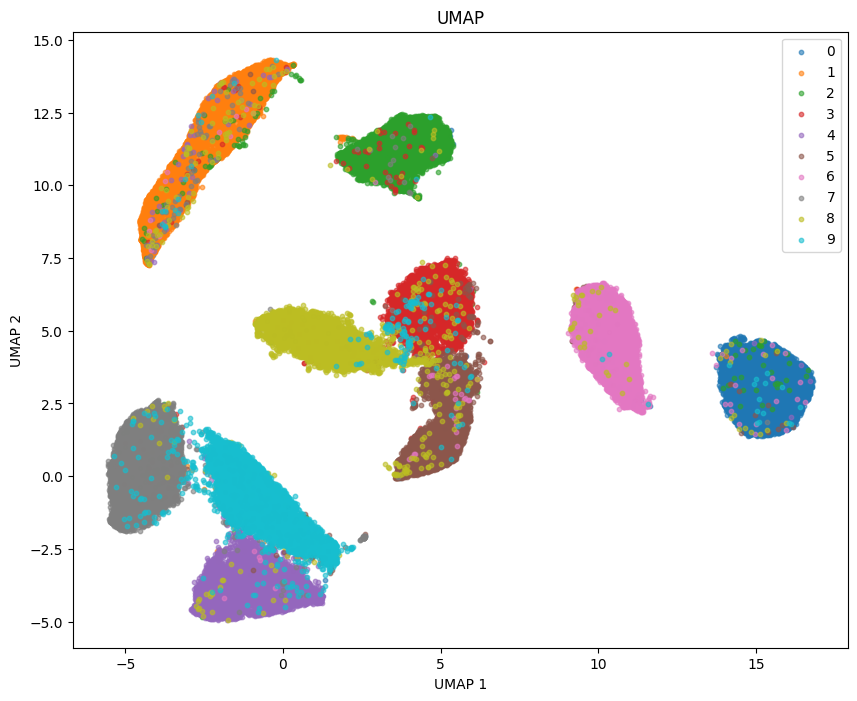

In [142]:
umap_method = umap.UMAP(n_components=2, random_state=seed)
x_train_umap = umap_method.fit_transform(x_train)
x_test_umap = umap_method.transform(x_test)

plt.figure(figsize=(10, 8))
for digit in range(10):
    idx = y_train == digit
    plt.scatter(x_train_umap[idx, 0], x_train_umap[idx, 1], label=str(digit), alpha=0.6, s=10)
plt.legend()
plt.title("UMAP")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

Στο UMAP βλέπουμε ότι οι κλάσεις δεν αλληλεπικαλύπτονται σχεδόν καθόλου και ο διαχωρισμός είναι σχεδόν τέλειος. Συνεχίζουν ωστόσο να υπάρχουν σφάλματα, αφού ορισμένα δείγματα ταξινομούνται λάθος.